<a href="https://colab.research.google.com/github/dharshini02/AI/blob/main/California_House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from sklearn.datasets import fetch_california_housing
california=fetch_california_housing()
X=california.data
y=california.target
data=pd.DataFrame(X,columns=california.feature_names)


In [ ]:
data['median_house_value']=y
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print(data.shape)

(20640, 9)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20640 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   Longitude           20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


##EDA

In [ ]:
data.isnull().sum()

MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
median_house_value    0
dtype: int64

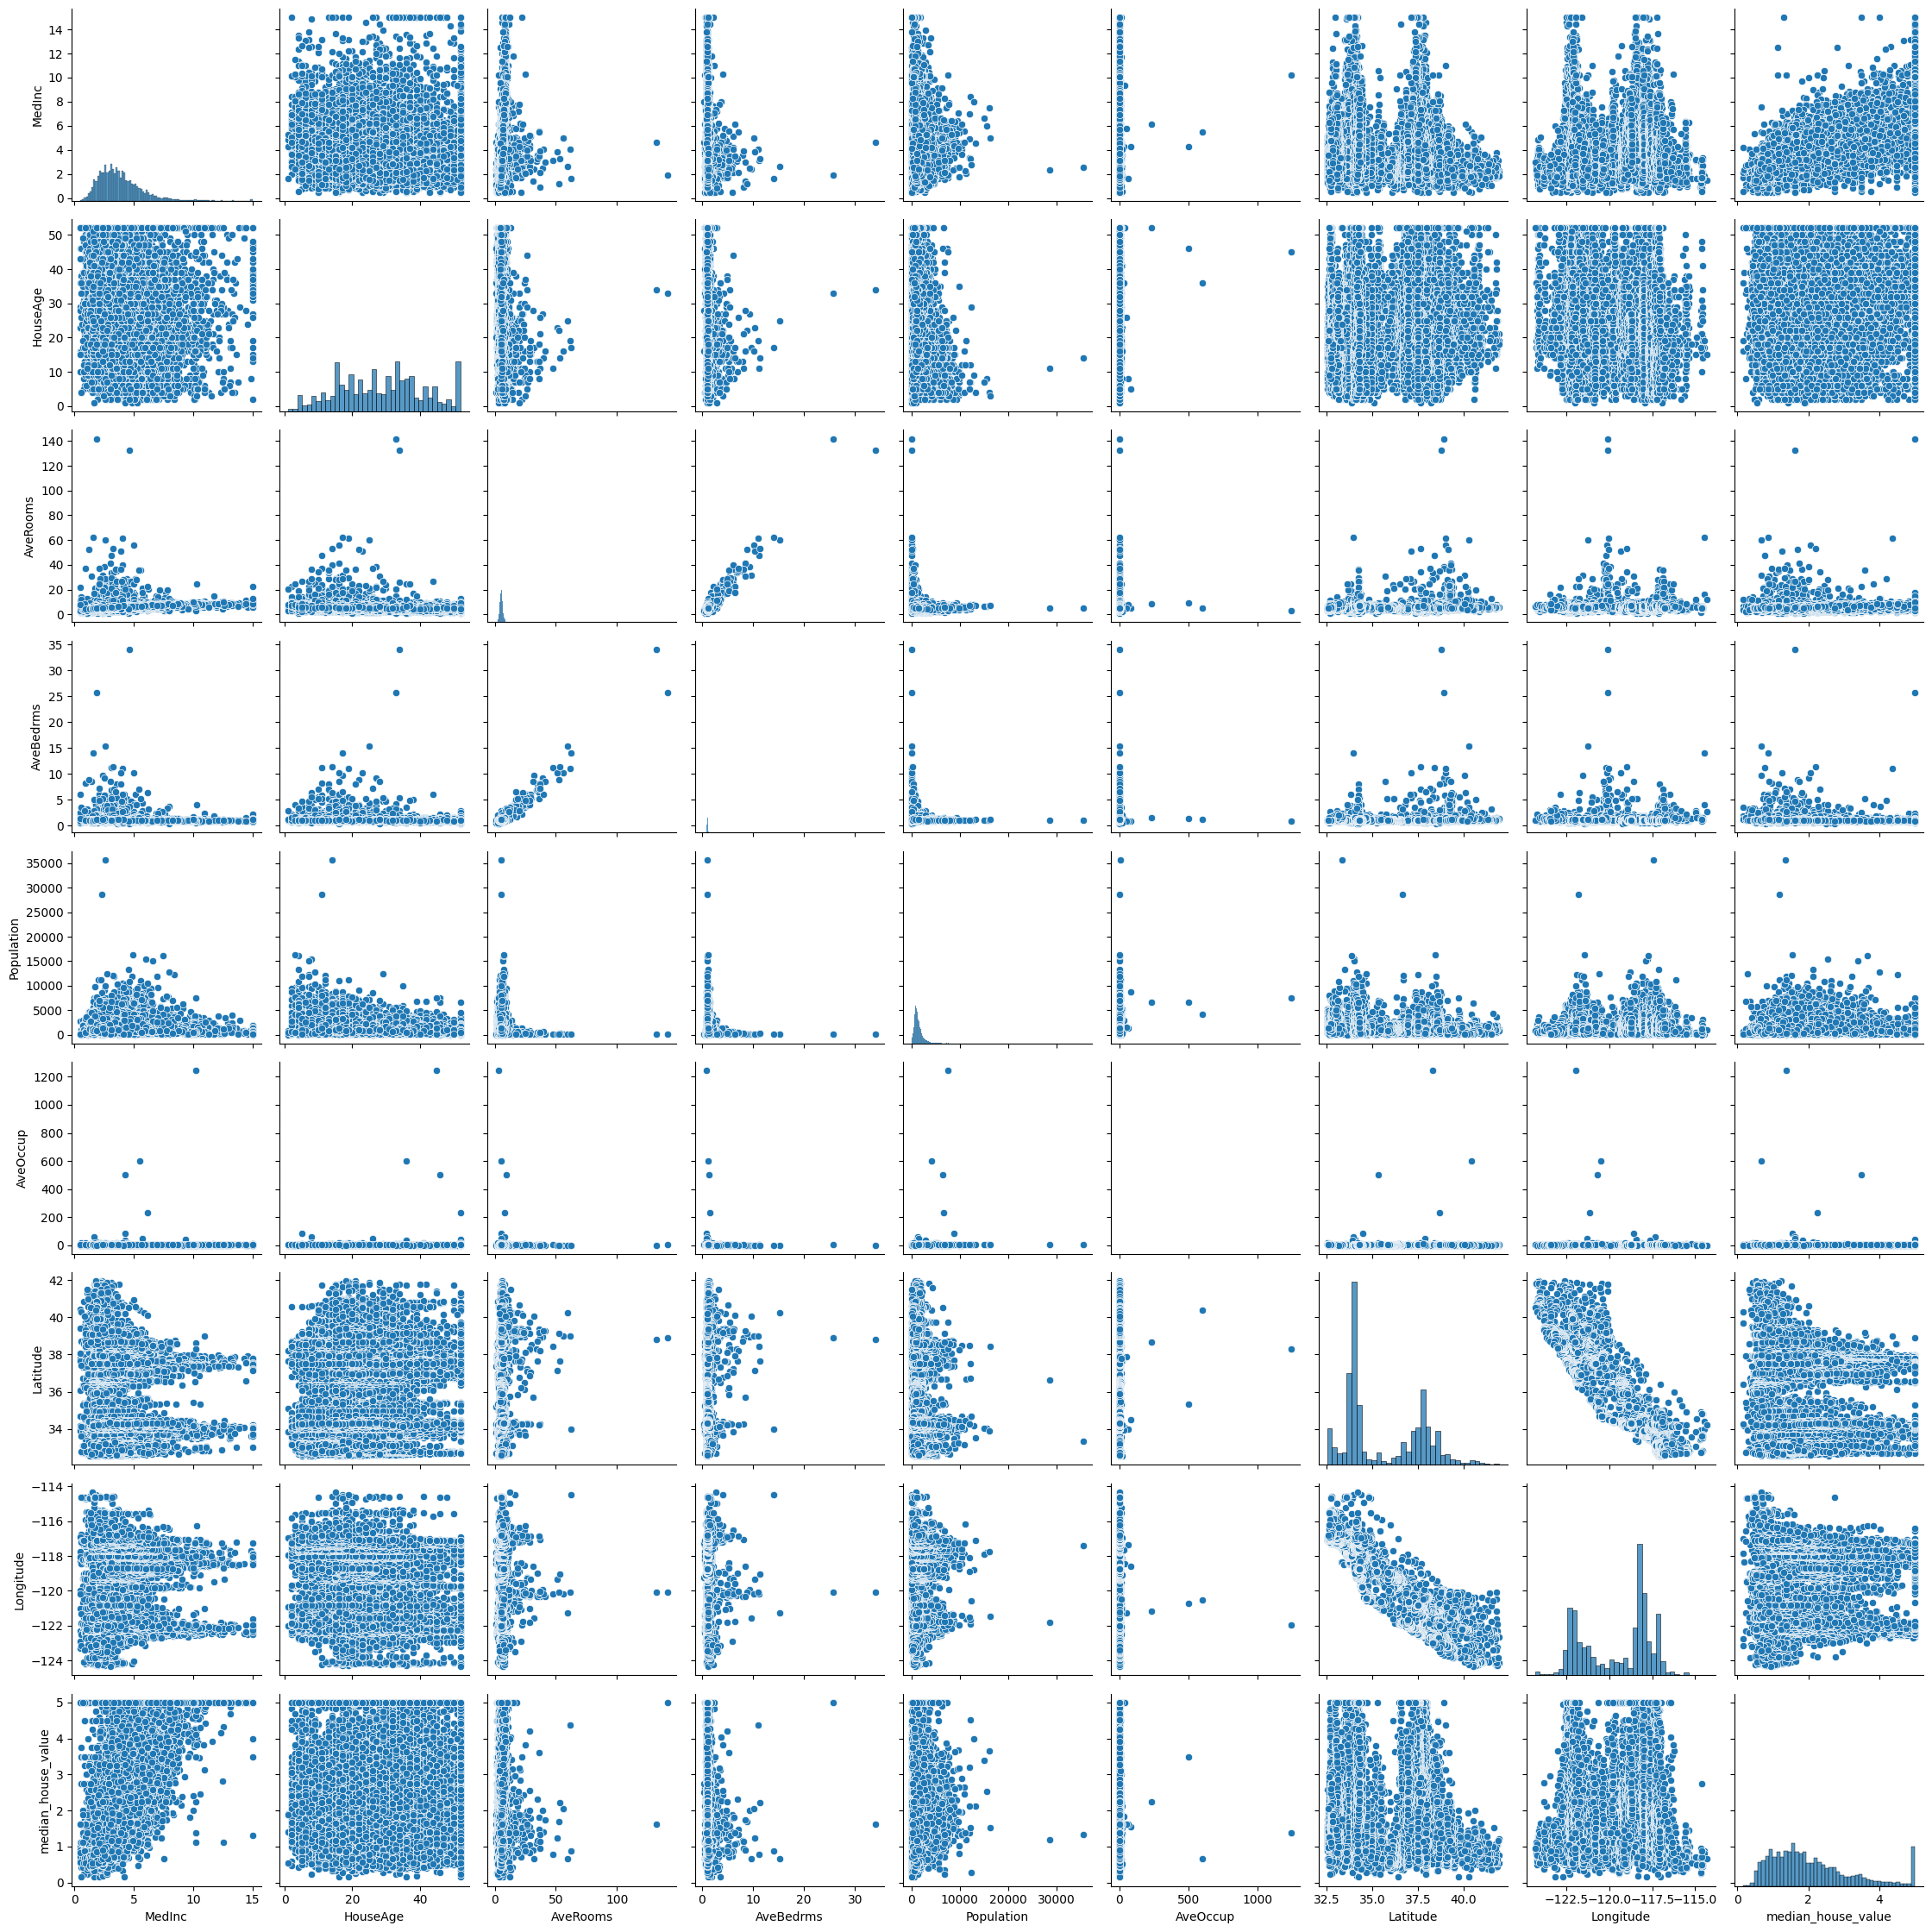

In [ ]:
sns.pairplot(data,height=2.5)
plt.tight_layout()

In [ ]:
print(data.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'median_house_value'],
      dtype='object')


<ipython-input-11-dfd9cfaad370>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['median_house_value'])


<Axes: xlabel='median_house_value', ylabel='Density'>

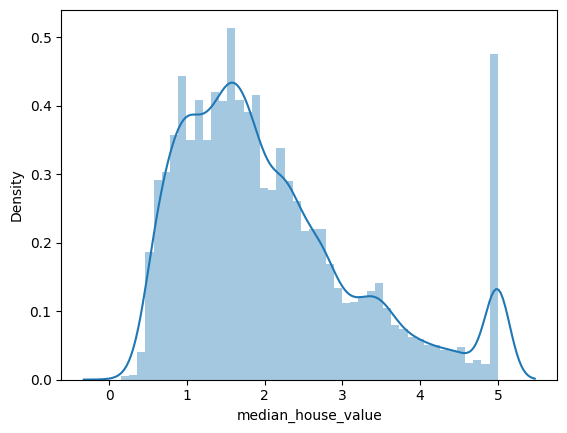

In [ ]:
sns.distplot(data['median_house_value'])

<Axes: xlabel='median_house_value', ylabel='Count'>

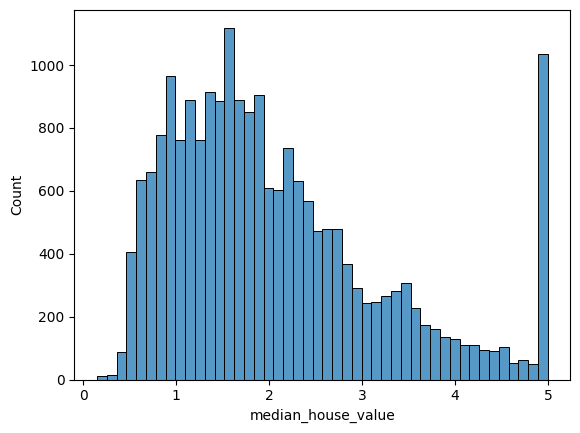

In [ ]:
sns.histplot(data['median_house_value'])

In [ ]:
print("skewness %f" %data['median_house_value'].skew())
print("kurtosis %f" %data['median_house_value'].kurt())

skewness 0.977763
kurtosis 0.327870


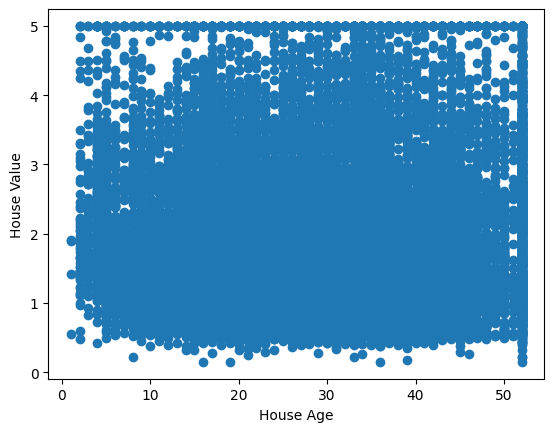

In [ ]:
fig, ax=plt.subplots()
ax.scatter(x=data['HouseAge'] ,y=data['median_house_value'])
plt.xlabel('House Age')
plt.ylabel('House Value')
plt.show()

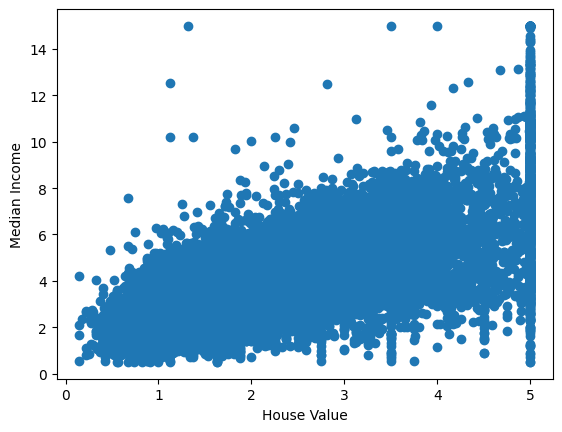

In [ ]:
fig, ax=plt.subplots()
ax.scatter(x=data['median_house_value'] ,y=data['MedInc'])
plt.xlabel('House Value')
plt.ylabel('Median Income')
plt.show()

<ipython-input-19-0c3e69c2a33c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['median_house_value'],fit=norm)



 mu=2.07 and sigma=1.15



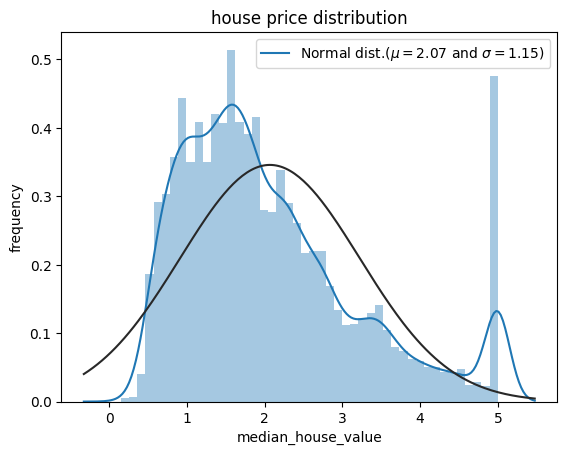

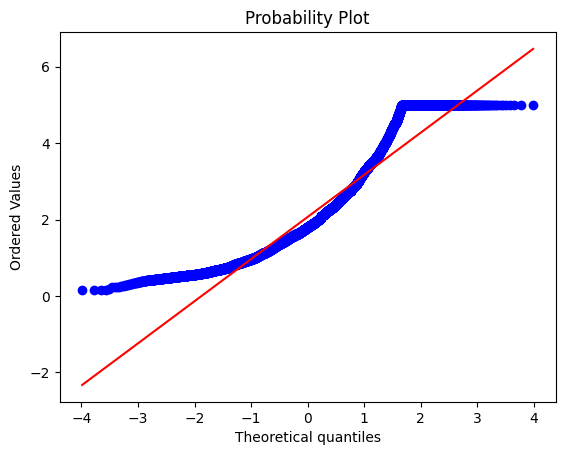

In [ ]:
from scipy import stats
from scipy.stats import norm,skew
sns.distplot(data['median_house_value'],fit=norm)
(mu,sigma)=norm.fit(data['median_house_value'])
print("\n mu={:.2f} and sigma={:.2f}\n".format(mu,sigma))
plt.legend(['Normal dist.($\mu=${:.2f} and $\sigma=${:.2f})'.format(mu,sigma)])
plt.ylabel("frequency")
plt.title("house price distribution")
#Get also the QQ-plot
fig=plt.figure()
res=stats.probplot(data['median_house_value'],plot=plt)
plt.show()

<ipython-input-27-7f72d98edd57>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['median_house_value'],fit=norm)



 mu=1.06 and sigma=0.36



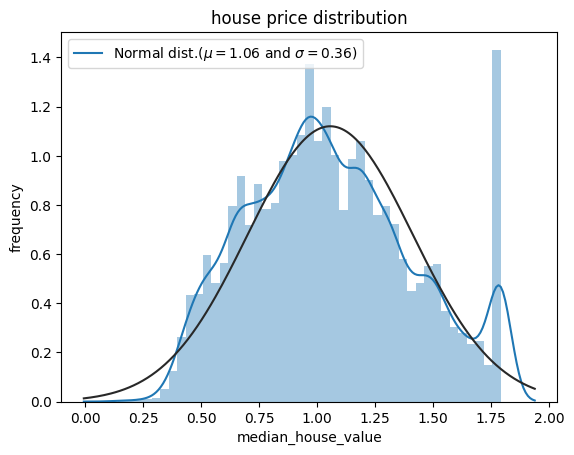

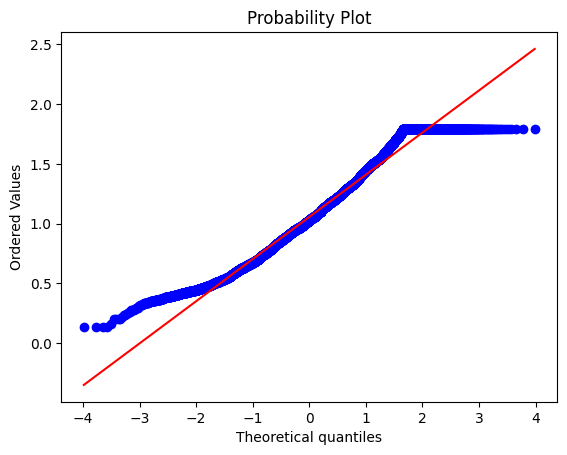

In [ ]:
data['median_house_value']=np.log1p(data['median_house_value'])
sns.distplot(data['median_house_value'],fit=norm)
(mu,sigma)=norm.fit(data['median_house_value'])
print("\n mu={:.2f} and sigma={:.2f}\n".format(mu,sigma))
plt.legend(['Normal dist.($\mu=${:.2f} and $\sigma=${:.2f})'.format(mu,sigma)])
plt.ylabel("frequency")
plt.title("house price distribution")
#Get also the QQ-plot
fig=plt.figure()
res=stats.probplot(data['median_house_value'],plot=plt)
plt.show()

##Data Correlation

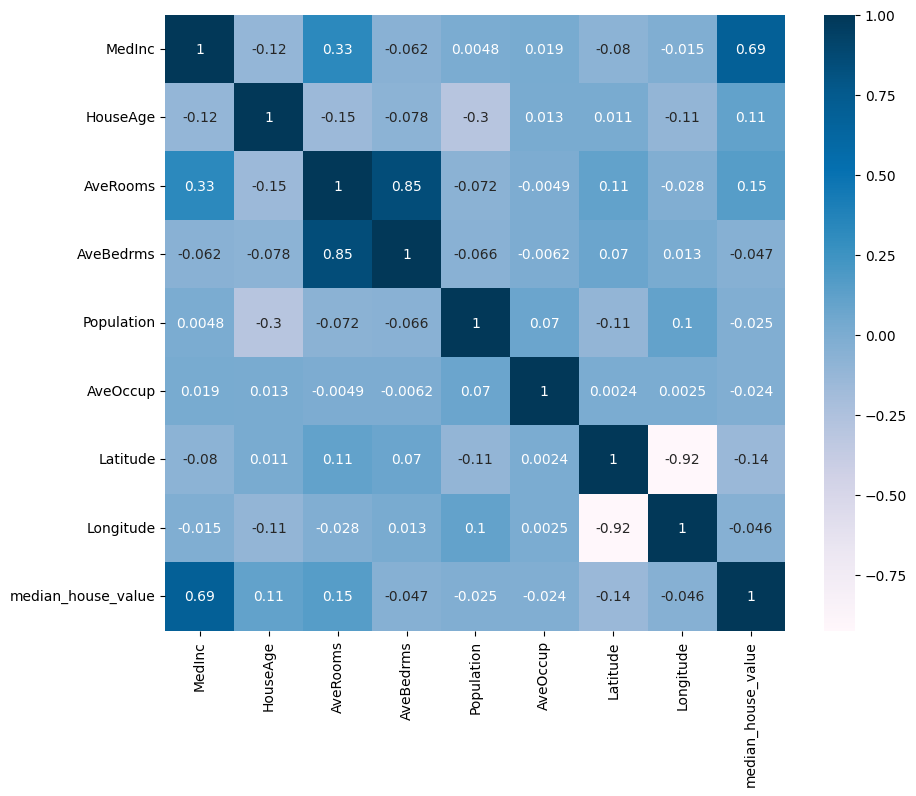

In [ ]:
plt.figure(figsize=(10,8))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.PuBu)
plt.show()

In [ ]:
cor_target=abs(cor['median_house_value'])#absolute value of the correlation
relevant_features=cor_target[cor_target>0.2]#display correlation feature
names=[index for index, value in relevant_features.items()]#getting the names from features
names.remove('median_house_value')
print(names)
print(len(names))

['MedInc']
1


## Model Building

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [ ]:
prediction=lr.predict(X_test)
print("Actual value of the house: " ,y_test.reset_index(drop=True)[0])
print("Model prdeicted value: " ,prediction[0])

Actual value of the house:  1.1832597627283945
Model prdeicted value:  1.0329361973693967


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,prediction)
rmse=np.sqrt(mse)
print(mse)
print(rmse)

0.048993368451565066
0.2213444565638929
